# Aufgabe 3

### Datensatz Employment

Für diesen Datensatz muss eine Klassifizierung mit zwei Klassen (arbeitslos/nicht arbeitslos) durchgeführt werden. 
Mögliche Methoden sind logistische Regression, k-Nearest-Neighbours, Decision Trees. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from pathlib import Path

<AxesSubplot:>

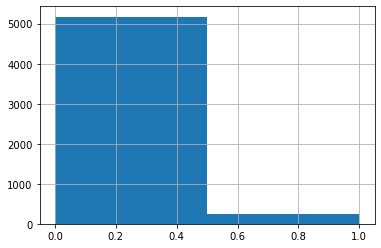

In [2]:
df = pd.read_csv(Path(r'../dataset/employment_08_09.csv'), sep=';')
df = df.replace(np.nan, 0)
df['unemployed'].hist(bins=2)

Zunächst stellt sich die Frage, welchen Einfluss das Alter auf eine mögliche Arbeitslosigkeit hat. Die Analyse zeigt, dass das Risiko alter Personen (>= 40 Jahre) etwas geringer ist, als das Risiko junger Personen

In [3]:
mean_risk_young = np.sum(df[df['age'] < 40]['unemployed'].values) / df[df['age'] < 40]['unemployed'].shape[0]
mean_risk_old = np.sum(df[df['age'] >= 40]['unemployed'].values) / df[df['age'] >= 40]['unemployed'].shape[0]

print("Risiko unter 40: ", mean_risk_young)
print("Risiko über 40: ", mean_risk_old)

Risiko unter 40:  0.05032618825722274
Risiko über 40:  0.04011022657685242


Das Durchführen von Linearer Regression führt auf dem Testdatensatz zu einem ähnlichen Ergebnis.

In [4]:
train,test=train_test_split(df, train_size = .8,random_state =42)

X_index = ['age', 'race', 'earnwke', 'married', 'union',
       'ne_states', 'so_states', 'ce_states', 'we_states', 'government',
       'private', 'self', 'educ_lths', 'educ_hs', 'educ_somecol', 'educ_aa',
       'educ_bac', 'educ_adv', 'female']
Y_index = ['unemployed']
regr = linear_model.LinearRegression()
regr.fit(train[X_index], train[Y_index])

pred_risk = regr.predict(test[X_index])
pred_risk[pred_risk < 0] = 0

risk_age = pd.DataFrame()
risk_age['age'] = test['age']
risk_age['pred_risk'] = pred_risk

mean_risk_young = np.sum(risk_age[risk_age['age'] < 40]['pred_risk'].values) / risk_age[risk_age['age'] < 40]['pred_risk'].shape[0]
mean_risk_old = np.sum(risk_age[risk_age['age'] >= 40]['pred_risk'].values) / risk_age[risk_age['age'] >= 40]['pred_risk'].shape[0]

print("Risiko unter 40: ", mean_risk_young)
print("Risiko über 40: ", mean_risk_old)

Risiko unter 40:  0.05028579526508357
Risiko über 40:  0.04239314547993008


Wie im Histogramm zu sehen ist, ist der Anteil der Personen, die ihren Job verlieren, sehr gering. Die Vorhersage "Person behält ihren Job" (most represented class) hat also eine sehr hohe Accuracy.

In [5]:
unemployed = np.sum(train[Y_index].values)
most_represented_class = 0
if(unemployed >= (train.shape[0] / 2)):
    most_represented = 1
accuracy = 1 - np.sum(np.abs(test[Y_index].values - most_represented_class)/test.shape[0])
print("Accuracy most represented class:", accuracy)

Accuracy most represented class: 0.9602954755309326


Zudem wird nun die k-Nearest-Neighbours-Methode durchgeführt. Auch hier ist eine hohe Accuracy zu erwarten, da die Zielvariable nur zwei Klassen enthält.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(train[X_index],train[Y_index].values.ravel())
y_pred = neigh.predict(test[X_index])
print("Accuracy k-NN:",metrics.accuracy_score(test[Y_index], y_pred))

Accuracy k-NN: 0.9575253924284395


### Datensatz Wachstum

,country_name,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
0,India,1.915168,0,765.999817,0.140502,1.45,0.133333,0.866667
1,Argentina,0.617645,0,4462.001465,0.156623,4.99,0.933333,1.933333
2,Japan,4.304759,0,2953.999512,0.157703,6.71,0.000000,0.200000
3,Brazil,2.930097,0,1783.999878,0.160405,2.89,0.100000,0.100000
4,United States,1.712265,0,9895.003906,0.160815,8.66,0.000000,0.433333
...,...,...,...,...,...,...,...,...
60,Cyprus,5.384184,0,2037.000366,0.979355,4.29,0.100000,0.166667
61,Malaysia,4.114544,0,1420.000244,1.105364,2.34,0.033333,0.033333
62,Belgium,2.651335,0,5495.001953,1.115917,7.46,0.000000,0.000000
63,Mauritius,3.024178,0,2861.999268,1.127937,2.44,0.000000,0.000000


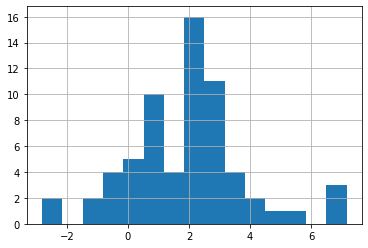

In [7]:
df = pd.read_csv(Path(r'../dataset/Growth.csv'), sep=';')
df['growth'].hist(bins=15)
df

Zunächst wird das Wachstum der Länder durch das durchschnittliche Wachstum in den Trainingsdaten vorhergesagt.

In [8]:
train,test=train_test_split(df, train_size = .8,random_state =42)

avg_growth = np.sum(train['growth'].values) / train.shape[0]

mse = np.square(np.subtract(test['growth'], avg_growth)).mean()

print("MSE average growth: ", mse)

MSE average growth:  6.4634735415105675


Zunächst ist zu erkennen, dass der Indikator "oil" für alle Länder 0 ist und damit nicht berücksichtigt werden muss.
Die Verteilung den Wachstums ist annähernd normalverteilt, daher bietet sich Lineare Regession an. Der MSE ist niedriger als zuvor und lineare Regression damit die bessere Methode

In [9]:
X_index = ['rgdp60', 'tradeshare', 'yearsschool',
       'rev_coups', 'assasinations']
Y_index = ['growth']
regr = linear_model.LinearRegression()
regr.fit(train[X_index], train[Y_index].values.ravel())

pred_growth = regr.predict(test[X_index])
mse = np.square(np.subtract(test['growth'].values, pred_growth)).mean()
print("MSE Linear Regression: ", mse)

MSE Linear Regression:  3.3542206511129966


### Datensatz Krebse

,ID,Color,Spine,Width,Weight,Satellites
0,1,2,3,28.3,3.05,8
1,2,3,3,26.0,2.60,4
2,3,3,3,25.6,2.15,0
3,4,4,2,21.0,1.85,0
4,5,2,3,29.0,3.00,1
...,...,...,...,...,...,...
168,169,2,3,28.3,3.20,0
169,170,2,3,26.5,2.35,4
170,171,2,3,26.5,2.75,7
171,172,3,3,26.1,2.75,3


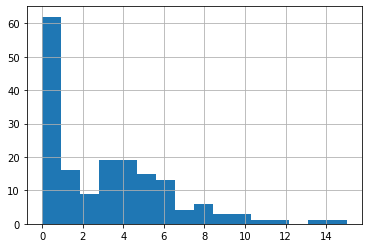

In [10]:
data = pd.read_csv(Path(r'../dataset/crabs.txt'), sep="     ", header=None,engine='python')
data.rename(columns= {0: 'ID', 1: 'Color', 2: "Spine", 3:"Width", 4:"Weight", 5:"Satellites"},inplace=True)
data['Satellites'].hist(bins=16)
data

Die Verteilung der "Satellites" entspricht einer Poisson-Verteilung (Zähl-Experiment), daher führen wir Poisson-Regession durch.

In [11]:
train,test=train_test_split(data, train_size = .8,random_state =42)

X_index = ['Color', 'Spine', 'Width', 'Weight']
Y_index = ['Satellites']
regr = linear_model.PoissonRegressor()
regr.fit(train[X_index], train[Y_index].values.ravel())

pred = regr.predict(test[X_index])
mse = np.square(np.subtract(test[Y_index].values, pred)).mean()
print("MSE poisson regression: ", mse)

MSE poisson regression:  9.333313758058885


Eine weiter Möglichkeit ist lineare Regression. Der MSE dieser Methode ist leicht größer, als der der Poisson Regression, da sie die Verteilung der Zielvariablen nicht berücksichtigt.

In [12]:
regr = linear_model.LinearRegression()
regr.fit(train[X_index], train[Y_index].values.ravel())

pred = regr.predict(test[X_index])
mse = np.square(np.subtract(test[Y_index].values, pred)).mean()
print("MSE Linear: ", mse)

MSE Linear:  9.694105430200578


### Gasoline Datensatz

In [13]:
df = pd.read_csv(Path(r'../dataset/gasoline.csv'), sep=';')
#Vorverarbeitung der Werte
df['yield'] = pd.to_numeric(df['yield'].apply(lambda x: x.replace(',','.')))
df['gravity'] = df['gravity'].apply(lambda x: x.replace(',','.'))
df['pressure'] = df['pressure'].apply(lambda x: x.replace(',','.'))
df

,Unnamed: 0,yield,gravity,pressure,temp10,temp,batch
0,1,0.122,50.8,8.6,190,205,1
1,2,0.223,50.8,8.6,190,275,1
2,3,0.347,50.8,8.6,190,345,1
3,4,0.457,50.8,8.6,190,407,1
4,5,0.080,40.8,3.5,210,218,2
5,6,0.131,40.8,3.5,210,273,2
6,7,0.266,40.8,3.5,210,347,2
7,8,0.074,40,6.1,217,212,3
8,9,0.182,40,6.1,217,272,3
9,10,0.304,40,6.1,217,340,3


<AxesSubplot:>

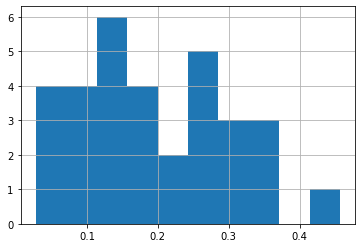

In [14]:
df['yield'].hist(bins=10)

Die Zielvariablen dieses Modells liegen im Intervall [0,1] und sind annähernd normalverteilt. Daher bietet sich Beta Regression an.

In [15]:
class BetaRegression(linear_model.LinearRegression):

    def fit(self, x, p):
        p = np.asarray(p)
        y = np.log(p / (1 - p))
        return super().fit(x, y)

    def predict(self, x):
        y = super().predict(x)
        return 1 / (np.exp(-y) + 1)
    
train,test=train_test_split(df, train_size = .8,random_state =42)


X_index = ['gravity', 'pressure', 'temp10', 'temp', 'batch']
Y_index = ['yield']
    
model = BetaRegression()
model.fit(df[X_index], df[Y_index])
pred = model.predict(test[X_index])
mse = np.square(np.subtract(test[Y_index].values, pred)).mean()
print("MSE Beta: ", mse)

MSE Beta:  0.0007258271939043981


Für eine ungefähre Annährung kann der Durchschnittswert verwendet werden, da die Zielvariable annähernd normalverteilt ist. Beta-Regression erreicht im Schnitt aber deutlich exaktere Werte

In [16]:
avg_yield = np.sum(train['yield'].values) / train.shape[0]

mse = np.square(np.subtract(test['yield'], avg_yield)).mean()
print("MSE Average: ", mse)

MSE Average:  0.009691525714285715
